In [2]:
import gc

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import accuracy_score, precision_score

from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

ImportError: cannot import name 'HistGradientBoostingClassifier' from 'sklearn.ensemble' (D:\Users\onots\Anaconda3\envs\env_pycharm\lib\site-packages\sklearn\ensemble\__init__.py)

In [2]:
class Learner():
    def __init__(self, classes : tuple, n_estimators : tuple, learning_rates : tuple, train_df : pd.DataFrame, test_df : pd.DataFrame, submission_df : pd.DataFrame):
        self.classes = classes
        self.n_estimators = n_estimators
        self.learning_rates = learning_rates
        self.train_df = train_df
        self.test_df = test_df
        self.submission_df = submission_df

        self.scored_classifiers = []
        self.classification_reports = []
    
    def split_dataset(self):        
        self.train_input, self.validation_input, self.train_output, self.validation_output = tts(self.train_df.drop(columns=["id", "status_group", "date_recorded"]), self.train_df["status_group"], test_size=0.3)
        return self.train_input, self.validation_input, self.train_output, self.validation_output
    
    def create_file(self, predicited_output, file_num : str):
        if predicited_output.shape[0] == self.submission_df.shape[0]:
            print(True)
            submission = self.submission_df.copy()
            for (idx,data) in submission["status_group"].iteritems():
                submission["status_group"][idx] = self.classes[predicited_output[idx]]                
            submission.to_csv("./datasets/submissions/submission_" + file_num + ".csv", index=False, header=True)
            del submission
            gc.collect()
    
    def create_classifier(self, learning_rate : float, estimator : int):
        classifer_model = HistGradientBoostingClassifier(learning_rate=learning_rate, n_estimators=estimator, max_depth=14)
        return classifer_model
    
    def train_model(self):
        dataset = self.split_dataset()
        for estimator in n_estimators:
            for learning_rate in learning_rates:
                classifier = self.create_classifier(learning_rate=learning_rate, estimator=estimator)
                classifier.fit(dataset[0], dataset[2])
                predicted_output = classifier.predict(dataset[1])
                acc_score = accuracy_score(predicted_output, dataset[3])

                self.classification_reports.append(self.create_classification_report(dataset[3], predicted_output)                )
                self.scored_classifiers.append((estimator, learning_rate, classifier, acc_score))
    
    def test_model(self, classifier : HistGradientBoostingClassifier,file_num : int,  create_file=True):
        self.test_df = self.test_df.fillna(self.test_df.median())
        predicted_output = classifier.predict(self.test_df.drop(columns=["id", "date_recorded"]))
        if create_file:
            self.create_file(predicted_output, str(file_num))
        return predicted_output
    
    def plot_confusion_matrix(self, classifier : HistGradientBoostingClassifier):
        plot_conf_matrix = plot_confusion_matrix(classifier, self.validation_input, self.validation_output, display_labels=classes, cmap=plt.cm.Blues, normalize='true') 
        return plot_conf_matrix
    
    def create_classification_report(self, validation_output, predicted_output):
        report = classification_report(validation_output, predicted_output, output_dict=True)   
        return pd.DataFrame(report).transpose()

    def get_cross_validation_score(self, classifier : HistGradientBoostingClassifier):
        return cross_val_score(classifier, self.validation_input, self.validation_output, cv=3)

## Public Variables

In [3]:
classes = ("functional", "functional needs repair","non functional")
n_estimators = (400, 500)
learning_rates = (0.02,0.05,0.08)

In [4]:
train_df = pd.read_csv("./datasets/train_clean.csv")
test_df = pd.read_csv("./datasets/test_clean.csv")
submission_df = pd.read_csv("./datasets/SubmissionFormat.csv")
input_columns = list(train_df.columns.values)

In [5]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('status_group',axis=1, inplace=True)

In [6]:
train_df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1559.0,1390,1764.0,34.938093,-9.856322,5520,0,...,2,5,3,3,3,2,2,0,0,0
1,8776,0.0,2013-03-06,1731.0,1399,1868.0,34.698766,-2.147466,17493,0,...,2,5,4,4,0,0,0,0,0,0
2,34310,25.0,2013-02-25,1431.0,686,1732.0,37.460664,-3.821329,37342,0,...,2,5,3,3,5,3,0,3,0,0
3,67743,0.0,2013-01-28,1265.0,263,1254.0,38.486161,-11.155298,12,0,...,2,5,1,1,4,5,2,3,0,2
4,19728,0.0,2011-07-13,1555.0,0,1454.0,31.130847,-1.825359,29877,0,...,2,5,2,2,0,0,0,0,0,0


In [7]:
train_df.columns.values

array(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'], dtype=object)

In [8]:
test_df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,1795.0,1996,1832.0,35.290799,-4.059696,7003,0,...,3,2,5,2,2,0,0,0,6,5
1,51630,0.0,2013-02-04,1967.0,1569,1300.0,36.656709,-3.309214,14711,0,...,3,2,5,4,4,3,2,2,0,0
2,17168,0.0,2013-02-01,1334.0,1567,1300.0,34.767863,-5.004344,14742,0,...,3,2,5,4,4,0,0,0,6,5
3,45559,0.0,2013-01-22,381.0,267,2349.0,38.058046,-9.418672,7335,0,...,2,2,5,1,1,2,1,2,6,5
4,49871,500.0,2013-03-27,615.0,1260,774.0,35.006123,-10.950412,30637,0,...,1,2,5,3,3,3,2,2,0,0


In [9]:
submission_df.head(5)

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


## Train the Model then predict the test values

In [10]:
learner = Learner(classes=classes, n_estimators=n_estimators, learning_rates=learning_rates, train_df=train_df.drop(columns=cols_remove), test_df=test_df.drop(columns=cols_remove), submission_df=submission_df)


In [11]:
learner.train_model()

In [12]:
for report in learner.classification_reports:
    print(report)
    print()
    print("*" * 90)
    print()

precision    recall  f1-score       support
0              0.805112  0.872785  0.837584   9708.000000
1              0.486175  0.328149  0.391829   1286.000000
2              0.824051  0.776004  0.799306   6826.000000
accuracy       0.796409  0.796409  0.796409      0.796409
macro avg      0.705113  0.658979  0.676240  17820.000000
weighted avg   0.789350  0.796409  0.790753  17820.000000

******************************************************************************************

              precision    recall  f1-score       support
0              0.803817  0.867738  0.834555   9708.000000
1              0.478458  0.328149  0.389299   1286.000000
2              0.818829  0.774685  0.796146   6826.000000
accuracy       0.793154  0.793154  0.793154      0.793154
macro avg      0.700368  0.656857  0.673333  17820.000000
weighted avg   0.786088  0.793154  0.787710  17820.000000

******************************************************************************************

              pr

In [13]:
classifiers = learner.scored_classifiers

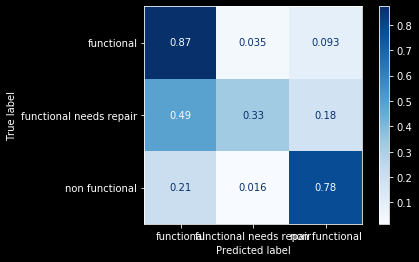

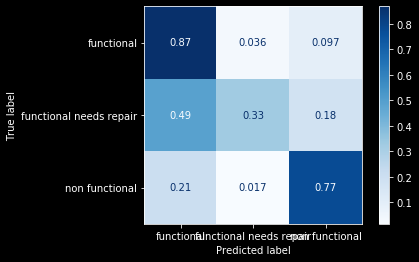

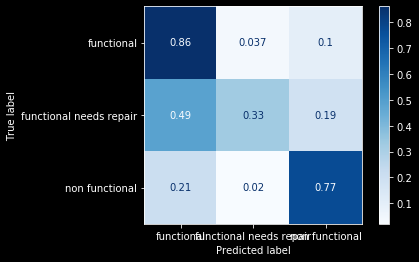

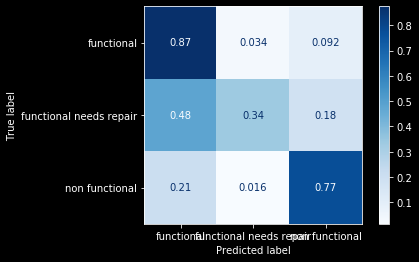

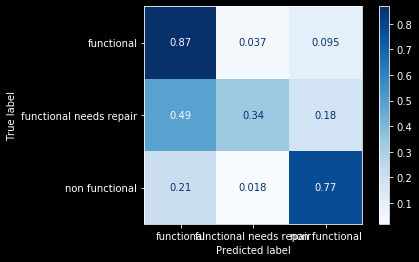

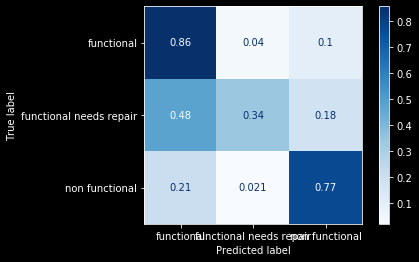

In [14]:
for tuple_item in classifiers:
    plot = learner.plot_confusion_matrix(classifier=tuple_item[2])
plt.show()

In [15]:
for tuple_item in classifiers:
    predicted_output = learner.test_model(classifier=tuple_item[2], file_num=tuple_item[0]+tuple_item[1])

True
True
True
True
True
True
